In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

import pytesseract
import shutil
import os
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance, ImageFilter
try:
 from PIL import Image
except ImportError:
 import Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# im = Image.open(filelist[0]) # the second one 
im = Image.open('drive/MyDrive/colabData/VFR_real_test/ACaslonPro-Bold/ACaslonPro-Bold3359.png') # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save('temp2.jpg')
text = pytesseract.image_to_string(Image.open('temp2.jpg'))
#      pytesseract.image_to_string(Image.open(image_path_in_colab), lang="rus")
print(text)

In [ ]:
ou_size = 28

In [ ]:
def rescaleLetter(im1, im2, out_size = ou_size):
  im1 = Image.open(im1)
  im2 = Image.open(im2)

  img = np.array(im2)
  bias = (int((out_size-img.shape[1])/2), int((out_size-img.shape[0])/2))

  im1.paste(im2, bias)
  img = np.array(im1)
  cv2_imshow(img)
  return img

Generate Background

In [ ]:
out_size = ou_size
background = np.array([255, 255, 255]*out_size*out_size).reshape(out_size,out_size, 3)
cv2_imshow(background)
cv2.imwrite('background.JPG', background)

True

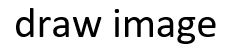

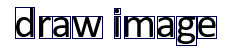

Max h or w of letter in pixels is 31


In [ ]:
im = cv2.imread('CaptureSome5.JPG')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

output = im.copy()
a = 0


max_value_HoW =0
letters = []
# print()
for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
    # hierarchy[i][0]: the index of the next contour of the same level
    # hierarchy[i][1]: the index of the previous contour of the same level
    # hierarchy[i][2]: the index of the first child
    # hierarchy[i][3]: the index of the parent
    if hierarchy[0][idx][3] == 0:
        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
        # cv2.resize(image, 28, 28)) 
        # cv2_imshow(output[y:y+h, x:x+w, :])
        max_value_HoW = h if max_value_HoW < h else max_value_HoW
        max_value_HoW = w if max_value_HoW < w else max_value_HoW

        a += 1
        if a == 10:
          break


a = 0

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    if hierarchy[0][idx][3] == 0:
        # cv2.resize(image, 28, 28))
        cropped = cv2.resize(output[y+1:y+h-1, x+1:x+w-1, :], (0,0), fx=ou_size/max_value_HoW, fy=ou_size/max_value_HoW)
        # print(cropped.shape)
        if cropped.shape[0]*cropped.shape[1] > 30:
          name = 'cropped' + str(idx) + '.png'
          cv2.imwrite(name, cropped)
          cropped = rescaleLetter('background.JPG', name)
          cv2.imwrite(name, cropped)
          letters.append(cropped)
        # cv2_imshow(cropped)
        # print(cv2.resize(output[y:y+h, x:x+w, :], (0,0), fx=28/max_value_HoW, fy=28/max_value_HoW).shape)
        # imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        # dst = cv2.addWeighted(cropped,0.7,background,0.3,0)
        # print(my_add_pic(cropped, background))
        # cv2_imshow(my_add_pic(cropped, background))
        # cv2_imshow(dst)
        # cv2_imshow(output[y:y+h, x:x+w, :])


        a += 1
        if a == 10:
          break

cv2_imshow(im)
# cv2_imshow(img_erode)
cv2_imshow(output)
print('Max h or w of letter in pixels is', max_value_HoW)
# cv2.waitKey(0)

In [ ]:
cv2_imshow(letters[3])

In [ ]:
text = pytesseract.image_to_string('CaptureSome4.JPG')

In [ ]:
for idx, letter in enumerate(letters):
  print(text[idx])
  cv2_imshow(letter)

b


r


o


w


n


In [ ]:
# x = np.concatenate((letters[4],letters[3],letters[2],letters[0],letters[1]), axis=0)
print(x.shape)
cv2_imshow(x)


AttributeError: ignored

In [ ]:
cv2.imwrite('test.png', x)

True

In [ ]:
text = pytesseract.image_to_string('test.png')
print(text)

O-Oosc



In [ ]:
cv2_imshow(letters[0])

In [ ]:
print(pytesseract.image_to_string(letters[3], config=("-c tessedit"
                  "_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
                  " --psm 10"
                  " -l osd"
                  " ")))

m



In [ ]:
cv2_imshow(letters[2])

AttributeError: ignored

In [ ]:
print(pytesseract.image_to_string('cropped1.png', config=("-c tessedit"
                  "_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
                  " --psm 10"
                  " -l osd"
                  " ")))

m



In [ ]:
def letters_extract(image_file: str, out_size=28):
    im = cv2.imread(image_file)
    # im = cv2.imread('hw.PNG')
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    # img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

    # # Get contours
    # contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = im.copy()

    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
        # hierarchy[i][0]: the index of the next contour of the same level
        # hierarchy[i][1]: the index of the previous contour of the same level
        # hierarchy[i][2]: the index of the first child
        # hierarchy[i][3]: the index of the parent
        if hierarchy[0][idx][3] == 0:
            # print("!!!!!!")
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = gray[y:y + h, x:x + w]
            # print(letter_crop.shape)

            # Resize letter canvas to square
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                # Enlarge image top-bottom
                # ------
                # ======
                # ------
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                # Enlarge image left-right
                # --||--
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

                # Resize letter to 28x28 and add letter and its X-coordinate
            # letters.append((x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)))
            letters.append((x, w, letter_square))

    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0], reverse=False)

    return letters

In [ ]:
letters = letters_extract('CaptureSome4.JPG')

In [ ]:
letters = letters_extract('alphabet3b.PNG')

In [ ]:
cv2_imshow(letters[0][2])
cv2_imshow(letters[1][2])
cv2_imshow(letters[2][2])
cv2_imshow(letters[3][2])
cv2_imshow(letters[4][2])
cv2_imshow(letters[5][2])
cv2_imshow(letters[6][2])
cv2_imshow(letters[7][2])
cv2_imshow(letters[8][2])
cv2_imshow(letters[9][2])
cv2.waitKey(0)

-1

In [ ]:
text = pytesseract.image_to_string('alphabet3b.PNG')

In [ ]:
for idx, letter in enumerate(letters):
  print(text[idx])
  cv2_imshow(letter[2])

a


b


c


d


e


f


g


h


i


j


k


l


m


n


o


p


q


r


s


t


u


v


w


x


y


z


In [ ]:
from skimage.color import rgb2gray
from skimage import io

def process(image):
    """
    Processes a CAPTCHA by removing noise

    Args:
        image (str): The file path of the image to process
    """

    input = io.imread(image)
    histogram = {}

    for x in range(input.shape[0]):
        for y in range(input.shape[1]):
            pixel = input[x, y]
            hex = '%02x%02x%02x' % (pixel[0], pixel[1], pixel[2])

            if hex in histogram:
                histogram[hex] += 1
            else:
                histogram[hex] = 1

    histogram = sorted(histogram, key = histogram.get, reverse=True)
    threshold = len(histogram) * 0.015

    for x in range(input.shape[0]):
        for y in range(input.shape[1]):
            pixel = input[x, y]
            hex = '%02x%02x%02x' % (pixel[0], pixel[1], pixel[2])
            index = histogram.index(hex)

            if index < 3 or index > threshold:
                input[x, y] = [255, 255, 255, 255]

    input = rgb2gray(~input)
    io.imsave(image, input)

In [ ]:
process('CaptureS2.PNG')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: CaptureS2.PNG is a low contrast image


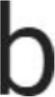

=D



-1

In [ ]:
import cv2
import numpy

#file = "pFgR2.jpg"
file = "cropped6.png"

original = cv2.imread(file)
miniature = cv2.resize(original, (100, 100))
gray = cv2.cvtColor(miniature, cv2.COLOR_BGR2GRAY)

(_ret, threshold) = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)

# Бинаризация отсекла букву от фона, выделив фон белым.
# Нам же нужно обратное.
threshold = 255 - threshold

(contours, _) = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Ищем квадрат с буквой.
# Задаем начальные максимальные и минимальные координаты квадрата.
# Осторожно! Ниже только целочисленные значения от 0 до 255.
mins = numpy.array((255, 255), numpy.uint8)
maxs = numpy.array((0, 0), numpy.uint8)

# Проходимся по квадратам контуров.
for rect in contours:
    (x, y, w, h)=cv2.boundingRect(rect)
    
    if x <= 0 or y <= 0:

        # «Глобальный» контур охватывает все изображение,
        # полностью портя вычисление квадрата с буквой.
        continue
    
    # Обновляем координаты квадрата с буквой с учетом квадрата каждого контура.
    maxs = numpy.maximum(maxs, (x + w, y + h))
    mins = numpy.minimum(mins, (x, y))
    
# Теперь мы можем получить итоговое изображение только с буквой.

# Если захотите увидеть контуры буквы на итоговом изображении.
#cv2.drawContours(miniature, contours, -1, (0, 255, 0), 2)

essence = miniature[ mins[1]:maxs[1], mins[0]:maxs[0] ]

cv2_imshow(essence)
custom_config = r'-l eng --oem 3 --psm 10 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz" '
c = pytesseract.image_to_string(essence, config=custom_config)
print(c)
cv2.waitKey(0)

d



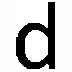

detected: d



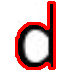

In [ ]:
import cv2
import numpy as np
import pytesseract

img = cv2.imread("cropped15.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

items = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = items[0] if len(items) == 2 else items[1]

img_contour = img.copy()
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    if 100 < area < 10000:
        cv2.drawContours(img_contour, contours, i, (0, 0, 255), 2)

detected = ""
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    ratio = h/w
    area = cv2.contourArea(c)
    base = np.ones(thresh.shape, dtype=np.uint8)
    if ratio > 0.9 and 100 < area < 10000:
        base[y:y+h, x:x+w] = thresh[y:y+h, x:x+w]
        segment = cv2.bitwise_not(base)

        custom_config = r'-l eng --oem 3 --psm 10 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz" '
        c = pytesseract.image_to_string(segment, config=custom_config)
        print(c)
        detected = detected + c
        cv2_imshow(segment)
        cv2.waitKey(0)

print("detected: " + detected)

cv2_imshow(img_contour)

cv2.waitKey(0)
cv2.destroyAllWindows()